<a href="https://colab.research.google.com/github/NAVEED261/MY-AI-ASSISTANT/blob/main/2_1_tools_messages_ipynb_learn_applied_generative_ai_fundamentals_03_langchain_ecosystem_langgraph_course_notebooks_module_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LLM Actions aur Structure Messages

# Review:
Humne aik simple graph banaya jisme nodes, normal edges, aur conditional edges shamil hain.

# Goals:
Ab hum Actions ki power ko AI Models ke sath samajhte hain aur is se pehle apne prompts ko structure karte hain.

## Messages

Chat Models Messages Use Kar Sakte Hain, Jo Conversation Mein Mukhtalif Roles Ko Capture Karte Hain.

LangChain mein mukhtalif message types ko support kiya jata hai, jisme HumanMessage, AIMessage, SystemMessage, aur ToolMessage shamil hain.
HumanMessage: User ki taraf se aaya hua message. INSHORT PROMPT
# AIMessage:
Chat model ka response.
# SystemMessage:
 Chat model ko behavior instruct karne ke liye message. MEANS LLM KI TRF SA AI KO INSTRUCTION DANA.
# ToolMessage:
 Kisi tool call se aaya hua message. MEANS WEBSEARCH YA TOOL SA AYA HOWA RESPONSE
Ab hum ek list of messages banate hain.

Har message mein kuch cheezen shamil ki ja sakti hain:

content: Message ka asal mazmoon.
name: Optional, message ke author ka naam.
response_metadata: Optional, ek dictionary jo metadata rakhti hai (jaise ke model provider ne AIMessages ke liye populate kiya ho).













HumanMessage: User ki taraf se aaya hua message.
AIMessage: Chat model ka response.
SystemMessage: Chat model ko behavior instruct karne ke liye message.
ToolMessage: Kisi tool call se aaya hua message.

LLM.INVOKE:   
MEANS LLM KO CALL KRHA HA NORMAL CONVESATION K LYA LIKE HA PROMPT "HELLO HOW R U " OUTPUT FROM LLM "IM FINE"
LLM WITH TOOL: MEANS LLM AI KO KHRHA HA K TOOLS USE KRO MEANS ...LLM JUB KO PROPER ANSWER NI DASKTA TO WO AI KO KHTA HA AAP TOOL USE KRO OR OUTPUT LO LIKE AS WEB SEARCH
LLM.BIND_TOOL: TOOL OR LLM KA APES MA CONNECTION DANA K LYA HOTA HA MEANS. AI LLM KO KHRHA HA AAP BIND TOOL USE KRO IS KAM K LYA
NOTE: LLM bind tools tab use karta hai jab koi mushkil kaam ho ya bahar se data chahiye ho, aur tool pehle se joda gaya ho. WERNA WO AI KO BTATA HA YA USE AAP KRO.








In [ ]:
%pip install --quiet -U langchain-google-genai

In [ ]:
from google.colab import userdata
gemini_api_key = userdata.get('my_stenographer_key')
from langchain_google_genai import ChatGoogleGenerativeAI

llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=gemini_api_key)


In [ ]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage


In [ ]:
llm.invoke("Hi naveed how r u")


AIMessage(content='As an AI, I don\'t have feelings or experiences like humans do, so I don\'t have a "how are you" to share. 😊 \n\nHow are you doing today? What can I help you with? \n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-175ad743-edf0-4aa3-aeba-b4e838b54320-0', usage_metadata={'input_tokens': 7, 'output_tokens': 47, 'total_tokens': 54, 'input_token_details': {'cache_read': 0}})

In [ ]:
messages = [HumanMessage(content="do  u know about pakistan?")]

result = llm.invoke(messages)
print(result)

content='Yes, I do! I have access to a vast amount of information about Pakistan, including:\n\n* **Geography:** Location, climate, terrain, major cities, rivers, mountains, etc.\n* **History:** From ancient civilizations to the modern era, including its independence, political history, and major events.\n* **Culture:** Languages, traditions, festivals, music, art, cuisine, and more.\n* **Demographics:** Population, ethnic groups, religions, education, healthcare, etc.\n* **Economy:** Industries, agriculture, trade, major exports and imports, etc.\n* **Politics:** Government structure, political parties, current events, etc.\n* **Society:** Social issues, gender roles, education system, healthcare system, etc.\n\nWhat specifically would you like to know about Pakistan? I can provide you with factual information, historical insights, or cultural details. Just ask! \n' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': '

In [ ]:
context_call = llm.invoke(messages)
print(context_call)

content='Yes, I know about Pakistan! I have access to a vast amount of information about it, including:\n\n* **Geography:** Location, climate, topography, major cities, etc.\n* **History:** From its independence to modern times, including significant events, leaders, and cultural developments.\n* **Culture:** Languages, religions, traditions, cuisine, music, art, and more.\n* **Politics:** Government structure, political parties, current events, etc.\n* **Economy:** Key industries, trade partners, economic challenges, and more.\n* **Society:** Demographics, social issues, education, healthcare, etc.\n\n**What would you like to know about Pakistan?** I can answer questions about specific topics, provide summaries, or offer relevant links to reputable sources. \n\nFor example, you could ask:\n\n* "What are the major industries in Pakistan?"\n* "Tell me about the history of the Pakistan Movement."\n* "What are some famous Pakistani dishes?"\n* "What are the current political challenges fa

In [ ]:
system_human_message = [
                SystemMessage(content="im learning generating ai ."),
                HumanMessage(content="What are u learning now a days?")
            ]
result = llm.invoke(system_human_message)
print(result)
#STRUCTURAL FORM MA PROMPT LYA OR TOOL KO CALL KI

content="As a large language model, I am constantly learning! I'm trained on a massive amount of text data, and I'm always being updated with new information. \n\nHere are some of the things I'm currently learning:\n\n* **New ways to understand and respond to your questions:** I'm always working on improving my ability to understand complex queries, provide accurate and relevant information, and generate creative and engaging responses.\n* **New languages:** I'm learning to communicate in more languages, so I can be helpful to a wider audience.\n* **New tasks:** I'm learning to perform new tasks, like writing different kinds of creative text formats, like poems, code, scripts, musical pieces, email, letters, etc. I will try my best to fulfill all your requirements.\n\nIt's an exciting time to be working with AI, and I'm constantly learning new things. I'm excited to see what the future holds!\n\n**What are you learning these days? I'm curious to hear about your interests!** \n" additio

In [ ]:

messages = [AIMessage(content=f"do u know about pakistan ?", name="Model")]
messages.append(HumanMessage(content=f"Yes, i know.",name="naveed"))
messages.append(AIMessage(content=f"Great, what would you like to learn about karachi.", name="Model"))
messages.append(HumanMessage(content=f" no but I want to learn about the best place to see Orcas in the US.", name="naveed"))

# Remove the parentheses after 'messages' in the for loop to iterate over the list elements
for m in messages:
  m.pretty_print()
    # jub b conversation hoti ha chat p to llm k pas is trh result jata ha.

================================== Ai Message ==================================
Name: Model

do u know about pakistan ?
================================ Human Message =================================
Name: naveed

Yes, i know.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about karachi.
================================ Human Message =================================
Name: naveed

 no but I want to learn about the best place to see Orcas in the US.


From now let's use HumanMessage to pass our Prompt to Model

## Tools

Tools model ke liye tab useful hote hain jab tumhain external systems ke sath interact karna ho.

External Systems (jaise APIs) aam taur par ek khaas input schema ya payload require karte hain, natural language ke bajaye.

Jab hum ek API ko tool ke tor par bind karte hain, toh model ko required input schema ke bare mein maloomat mil jati hai.

Model user ke natural language input ke base par decide karta hai ke kis tool ko call karna hai.

Aur model phir aisa output return karta hai jo tool ke schema ke mutabiq ho.

Kai LLM providers tool calling ko support karte hain, aur LangChain mein tool calling ka interface bohot simple hai.

Tum asaani se kisi bhi Python function ko ChatModel.bind_tools(function) mein pass kar sakte ho.








I

In [ ]:
%%capture --no-stderr
%pip install --quiet -U langchain-google-genai langchain_core langgraph

In [ ]:
from google.colab import userdata
gemini_api_key = userdata.get('my_stenographer_key')
from langchain_google_genai import ChatGoogleGenerativeAI

llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=gemini_api_key)

In [ ]:
from langchain_core.messages import HumanMessage

## Tool Calling

In [49]:
print("\n\nllm\n", llm, "\n\n\n")
# llm ko model ma jo rakha ha uski detail ha



llm
 model='models/gemini-1.5-flash' google_api_key=SecretStr('**********') client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7ca4df19a020> default_metadata=() 





In [81]:
def deposit_money(name: str, bank_account_no: int, amount:int) -> int:
    """Deposit Money in Bank account.

    Args:
        name: first str
        bank_account_no: second int
        amount:third int
      RETURN:str in format form
    """
    # is ko description kho ya docs string
    # BUSINESS LOGIC for Bank Deposit
    # ......
    return f"Deposit {amount } Successfule in {name} and {bank_account_no }"

In [82]:
deposit_money(name="hafiz naveed uddin",bank_account_no=353343434, amount=50000)
# ya only status chk krna k lya but ya llm na hama bta na


'Deposit 50000 Successfule in hafiz naveed uddin and 353343434'

In [85]:
llm_with_tools = llm.bind_tools([deposit_money])
#AI NA  LLM KO BIND TOOL K ZREA TOOL K SATH INTEGRATE KRWAYA OR KHA LIST MA KAFI SARE DEPOST MONAY HA


In [86]:
llm_with_tools
# IS MA LLM KI DETAIL K SATH FUNCTION KI DETAIL B ATI HA

RunnableBinding(bound=ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7ca4df19a020>, default_metadata=()), kwargs={'tools': [{'function_declarations': [{'name': 'deposit_money', 'description': 'Deposit Money in Bank account.\n\n    Args:\n        name: first str\n        bank_account_no: second int\n        amount:third int\n      RETURN:str in format form', 'parameters': {'type_': 6, 'description': 'Deposit Money in Bank account.\n\nArgs:\n    name: first str\n    bank_account_no: second int\n    amount:third int\n  RETURN:str in format form', 'properties': {'bank_account_no': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'amount': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0

In [87]:
call = llm.invoke(
    [HumanMessage(content=f"Deposit 4000 Money in hafiz naveed  Account. His acc number is 00123", name="naveed")])
call
# llm.invoke is ko call is sa kya jata ha"llm:ChatGoogleGenerativeAI" but tool calling ki phchan "llm_with_tools" issa hogi llm_with_tools.invoke k name sa
# sub sa phla humna without tool wala llm ko call ki

AIMessage(content='I understand you\'re looking to deposit money into an account, but I can\'t actually make financial transactions. I\'m a language model and don\'t have access to real-world systems like bank accounts. \n\nTo deposit money into Hafiz Naveed\'s account, you\'ll need to use a method provided by his bank, such as:\n\n* **Online banking:** Log in to your online banking account, find the "transfer funds" option, and enter Hafiz Naveed\'s account number and the amount.\n* **Mobile banking app:** Use your bank\'s mobile app to transfer funds following similar steps as online banking.\n* **ATM:**  Use an ATM to deposit cash into his account, if his bank allows this. You\'ll likely need his account number or a deposit slip.\n* **Bank branch:** Visit your bank branch and request a deposit into Hafiz Naveed\'s account. \n\n**Important Note:**  Be sure to confirm the correct account number and bank before making any transfers.  \n\nPlease let me know if you have any other questio

In [88]:
call = llm_with_tools.invoke(
    [HumanMessage(content=f"Deposit  5000 Money in hafiz naveed Account. His acc number is 00123", name="Muhammad")])
call
# ub hmna tool k zrea call ki
# note: yha llm na

AIMessage(content='', additional_kwargs={'function_call': {'name': 'deposit_money', 'arguments': '{"name": "hafiz naveed", "amount": 5000.0, "bank_account_no": 123.0}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-26b69470-63c4-44b0-ae07-b2df155f6d46-0', tool_calls=[{'name': 'deposit_money', 'args': {'name': 'hafiz naveed', 'amount': 5000.0, 'bank_account_no': 123.0}, 'id': 'c6ecc95d-091b-49e8-a3a1-55628db101a2', 'type': 'tool_call'}], usage_metadata={'input_tokens': 127, 'output_tokens': 37, 'total_tokens': 164, 'input_token_detai

# NOTE:

YHA TK HMNA TOOL KO CALL KRNA SEKHA HA.......

### Building Graph

# **Humare paas ek LLM hai jo Tool Calling karne ki Qabiliyat rakhta hai: bind_tools ka istemal kar ke**
Ab hum LangGraph ke zariye Orchestration karte hain

0. State

In [106]:
from typing_extensions import TypedDict

class Last_Msg_State(TypedDict):
    messages: list
    # Yeh ek state banai hai jiska naam Last_Msg_State hai, jismein messages ki ek list hogi

# 1. Tool Calling LLM ki Node
def call_llm(state: Last_Msg_State):
    # Yeh function state ko accept karta hai. Yeh state aik dictionary jaisi hai jismein "messages" ki list hai.

    messages = state["messages"]
    # Yeh line state ke andar se "messages" wali list ko nikalti hai, aur usko variable 'messages' mein store karti hai

    call_response = llm_with_tools.invoke(messages)
    # Yeh LLM ko messages bhejta hai tool ke sath (jaise web search) aur uska jawab call_response mein store karta hai

    messages.append(call_response)
    # Jo jawab LLM se aaya hai, usko messages ki list mein add (append) kar do, taake poori conversation safe ho jaye

    return {"messages": messages}
    # Yeh function updated messages ki list ko wapas return karta hai jismein purane aur naye sabhi messages hain


In [107]:
call_llm(state={"messages": [SystemMessage(content="You are a helpful assistant. Your name is Bob."), HumanMessage(content="What is your name?")]})


{'messages': [SystemMessage(content='You are a helpful assistant. Your name is Bob.', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='What is your name?', additional_kwargs={}, response_metadata={}),
  AIMessage(content="Hi, I'm Bob! 👋 How can I help you today? \n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-ac3cfcc6-c240-48c5-b644-24b7b022535b-0', usage_metadata={'input_tokens': 119, 'output_tokens': 15, 'total_tokens': 134, 'input_token_details': {'cache_read': 0}})]}

# from typing_extensions import TypedDict
Scenario: Socho tum ek book likh rahe ho jismein tumhe har chapter ko alag tarike se define karna hai. TypedDict ek tareeqa hai jismein tum chapter ki headings ya format pehle se tayar kar rahe ho. Isse tumhe pata rehta hai ke kaunse type ki information kahaan store hogi.
# class Last_Msg_State(TypedDict):
    messages: list
    # State banai Last_Msg_State k naam se, jismein messages ki ek list hogi
Scenario: Socho tumhare paas ek diary hai jismein tum sabhi conversations note karte ho. Is class ka naam Last_Msg_State hai, matlab yeh ek diary hai jismein purane aur naye messages store honge. Is diary mein messages ek list jaisi hogi jismein saari baatein likhi jaaengi.
# def call_llm(state: Last_Msg_State):
    # Yeh function state ko accept karta hai. Yeh state aik dictionary jaisi hai jismein "messages" ki list hai
Scenario: Imagine ek helper hai jiska kaam tumhare diary (state) ko read karna hai aur decide karna hai agla kaam kya hona chahiye. Yeh function woh helper hai jisko tumhari purani baatein ya messages ki list di gayi hai taake wo aage response generate kar sake.
# messages = state["messages"]
# Yeh line state ke andar se "messages" key ko access karo, aur usko variable 'messages' mein store karo
Scenario: Socho helper ko tumne diary di hai, aur wo purani baatein nikal kar ek nayi copy (variable messages) mein likh raha hai, taki naye jawab likhne se pehle uske paas poora context ho.
# call_response = llm_with_tools.invoke(messages)
# llm_with_tools ke zariye invoke method call kar ke messages ko pass karo, is se AI response generate hoga
Scenario: Imagine tumhara helper ek AI assistant se baat kar raha hai. Wo purani baatein ya context AI ko de raha hai (jiska naam llm_with_tools hai), taake AI soch kar ek sahi jawab de sake. Yahan invoke ek tarah se "AI se jawab mangwana" hai.
# messages.append(call_response)
# Jo jawab LLM se aaya hai, usko messages ki list mein add (append) kar do, takay poori conversation safe ho jaye
Scenario: Ab helper updated diary wapas tumhein de raha hai, jismein tumhari purani baatein bhi hain aur naye jawab bhi hain. Yeh ensure karta hai ke tumhari poori baat-chit maintain ho, aur tum dobara is list ko use kar ke aage conversation continue kar sako.

# full Scenario Example:
Tum ek diary (state) maintain kar rahe ho jismein tum apni purani aur nayi baatein likhte ho.
Helper (function call_llm) tumhari diary se purani baatein (messages) nikal kar AI assistant (llm_with_tools) ke paas le jaata hai, taake us context ko samajh kar AI ek jawab de sake.
Jab AI apna jawab deta hai, toh helper us jawab ko wapas tumhari diary mein add kar deta hai.
Iske baad tumhare paas updated diary hai, jismein tumhara pehle ka sab kuch likha hai aur naye jawab bhi hain, aur tum is updated version se aage ki conversation kar sakte ho.
Yeh scenario-based explanation tumhein har step ki wajah aur process ko achi tarah samajhne mein madad degi. 😊









In [108]:


# from typing_extensions import TypedDict

# class Last_Msg_State(TypedDict):
#     messages: list
#     # Yeh ek state banai hai jiska naam Last_Msg_State hai, jismein messages ki ek list hogi

# # 1. Tool Calling LLM ki Node
# def call_llm(state: Last_Msg_State):
#     # Yeh function state ko accept karta hai. Yeh state aik dictionary jaisi hai jismein "messages" ki list hai.

#     messages = state["messages"]
#     # Yeh line state ke andar se "messages" wali list ko nikalti hai, aur usko variable 'messages' mein store karti hai

#     call_response = llm_with_tools.invoke(messages)
#     # Yeh LLM ko messages bhejta hai tool ke sath (jaise web search) aur uska jawab call_response mein store karta hai

#     messages.append(call_response)
#     # Jo jawab LLM se aaya hai, usko messages ki list mein add (append) kar do, taake poori conversation safe ho jaye

#     return {"messages": messages}
#     # Yeh function updated messages ki list ko wapas return karta hai jismein purane aur naye sabhi messages hain


# 2. Graph

from langgraph.graph import StateGraph, START, END

builder: StateGraph = StateGraph(Last_Msg_State)
# state ka graph bnaya
# define nodes
builder.add_node("call_llm_with_tools", call_llm)
# yha jis nam sa function oper bna tah wo nam aiga
# define edges
builder.add_edge(START, "call_llm_with_tools")
builder.add_edge("call_llm_with_tools", END)

# build graph
graph = builder.compile()
# jub state node or edge sub aagai to  sub ko compiled krdya

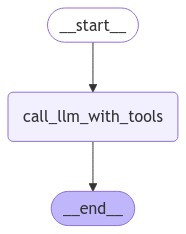

In [109]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [110]:
graph.invoke({"messages": [HumanMessage(content="Hi im naveed how r u?")]})

{'messages': [HumanMessage(content='Hi im naveed how r u?', additional_kwargs={}, response_metadata={}),
  AIMessage(content="I am an AI language model, so I don't have feelings like humans do. But I am here to assist you! How can I help you today? \n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-dc7064ff-3d06-4167-8732-0337dc2b79a9-0', usage_metadata={'input_tokens': 111, 'output_tokens': 33, 'total_tokens': 144, 'input_token_details': {'cache_read': 0}})]}

In [111]:
graph.invoke({"messages": [HumanMessage(content="Deposiut 7000 in hafiz naveed account  - his bank num is 001")]})

{'messages': [HumanMessage(content='Deposiut 7000 in hafiz naveed account  - his bank num is 001', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'deposit_money', 'arguments': '{"name": "hafiz naveed", "bank_account_no": 1.0, "amount": 7000.0}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-ff537297-fa64-449f-9190-a1d24b1d039a-0', tool_calls=[{'name': 'deposit_money', 'args': {'name': 'hafiz naveed', 'bank_account_no': 1.0, 'amount': 7000.0}, 'id': 'e2648030-35e8-4cb

#### Current Flow

- LLM: Is Tool ko Call karo
System: Tool call kiya aur LLM ko result bataya.
Issue ??: Mera Human Message kahan hai?
Abhi tak response mein sirf AIMessage hi hai.

# Solutions:

Proposal 1: Manually Add Messages
Call LLM mein manually messages add karo using LLM, taake human messages bhi include ho jayein.

Proposal 2: Reducer Functions to Keep History Context
Reducer Functions ka istemal karo taake conversation ka history context maintain rahe aur purane messages bhi context mein shamil ho jayein.






